In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

from ipynb_path import *

In [2]:
from counterfactual.import_essentials import *
from counterfactual.evaluate import load_trained_model, model_cf_gen
from counterfactual.net import AdvCounterfactualModel
from counterfactual.adversarial_experiment import *
from counterfactual.adversarial_experiment import _calculate_validity_matrix
from tqdm.notebook import tqdm

plt.style.use(['science'])

In [4]:
data_dir_list = [
        f"assets/data/adv/loan/year={year}.csv" for year in range(1994, 2010)
]
df = pd.concat(tuple(pd.read_csv(data_dir) for data_dir in data_dir_list))

In [5]:
len(df)

449152

In [4]:
interval = 3

In [5]:
def load_model_dict(default_path_dir):
    model_path_dict = {
        str(year): sorted(list(Path(f"{default_path_dir}/year={year}/version_0/checkpoints").glob('*.ckpt'))) 
            for year in range(1994, 2010)
    }
    model_dict = {
        str(year): [load_trained_model(AdvCounterfactualModel, str(model_path)) 
            for i, model_path in enumerate(model_path_dict[str(year)]) 
                if i % interval == 0]
                    for year in range(1994, 2010)
    }
    return model_dict



In [6]:
def cf_results(model_dict):
    results = []
    n_models = len(model_dict['1994'])
    for j in tqdm(range(n_models)):
        cf_results = {}
        for i, year in enumerate(range(1994, 2010)):
            cf_results[f'm_{i}'] = model_cf_gen(model_dict[str(year)][j])
        validity_matrix = _calculate_validity_matrix(
            [model_dict[str(year)][j] 
                for year in range(1994, 2010)], cf_results
        )
        cf_results_df = avg_validity_changes(validity_matrix)
        proximity_list = [cf_results[f'm_{j}']['proximity'] for j in range(16)]
        cf_results_df['proximity'] = [
            np.average(proximity_list), np.std(proximity_list)
        ]
        results.append(cf_results_df)
    return results

    

In [7]:
model_dict_static = load_model_dict("../log/mse/static/adv/loan")
static_cf_results = cf_results(model_dict_static)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

In [8]:
model_dict_linear = load_model_dict("../log/mse/linear/adv/loan")
linear_cf_results = cf_results(model_dict_linear)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (16230, 7), x_cat: (16230, 103)
(16230, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (23358, 7), x_cat: (23358, 103)
(23358, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20813, 7), x_cat: (20813, 103)
(20813, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19924, 7), x_cat: (19924, 103)
(19924, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (19568, 7), x_cat: (19568, 103)
(19568, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20578, 7), x_cat: (20578, 103)
(20578, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20654, 7), x_cat: (20654, 103)
(20654, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (20889, 7), x_cat: (20889, 103)
(20889, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (24834, 7), x_cat: (24834, 103)
(24834, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (33173, 7), x_cat: (33173, 103)
(33173, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (40312, 7), x_cat: (40312, 103)
(40312, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (48329, 7), x_cat: (48329, 103)
(48329, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51124, 7), x_cat: (51124, 103)
(51124, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (51025, 7), x_cat: (51025, 103)
(51025, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (27332, 7), x_cat: (27332, 103)
(27332, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: None, using: 0 TPU cores
x_cont: (11009, 7), x_cat: (11009, 103)
(11009, 110)

  | Name      | Type                 | Params | In sizes | Out sizes
--------------------------------------------------------------------------
0 | model     | _CounterfactualModel | 25.8 K | ?        | ?        
1 | model_dup | _CounterfactualModel | 25.8 K | ?        | ?        
--------------------------------------------------------------------------
51.5 K    Trainable params
0         Non-trainable params
51.5 K    Total params


Training: 0it [00:00, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

In [9]:
static_cf_results[-1]

,cf_validity,cf_validity (w=1),cf_validity (all),validity_decrease (w=1),validity_decrease (all),proximity
mean,0.992151,0.989484,0.934082,0.003331,0.058069,7.533616
std,0.004115,0.005339,0.132476,0.003617,0.131092,0.745074


In [10]:
linear_cf_results[-1]

,cf_validity,cf_validity (w=1),cf_validity (all),validity_decrease (w=1),validity_decrease (all),proximity
mean,0.990704,0.987493,0.923036,0.003875,0.067668,7.472561
std,0.004914,0.007563,0.141099,0.004922,0.139376,0.777308


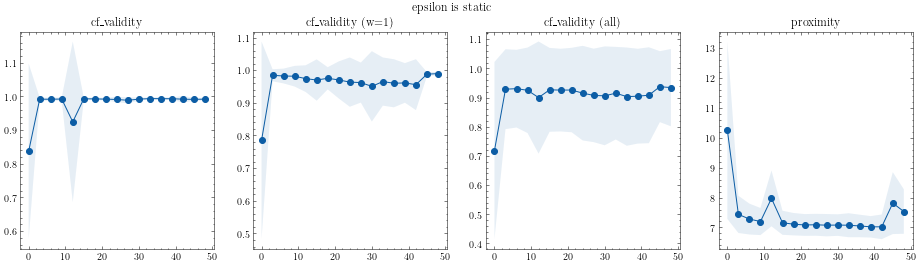

In [15]:
fig, axs = plt.subplots(1, 4,  figsize=(16, 4))
n_models = len(model_dict_static['1994'])
epochs = np.arange(n_models) * interval
columns = ['cf_validity', 'cf_validity (w=1)', 'cf_validity (all)', 'proximity']

fig.suptitle('epsilon is static')
for i, col in enumerate(columns):
    avg_res_list = np.array([static_cf_results[i][col]['mean'] for i in range(n_models)])
    std_res_list = np.array([static_cf_results[i][col]['std'] for i in range(n_models)])
    axs[i].plot(epochs, avg_res_list, marker='o')
    axs[i].fill_between(
        epochs, 
        avg_res_list - std_res_list,
        avg_res_list + std_res_list,
        alpha=0.1,
    )
    axs[i].set_title(col)


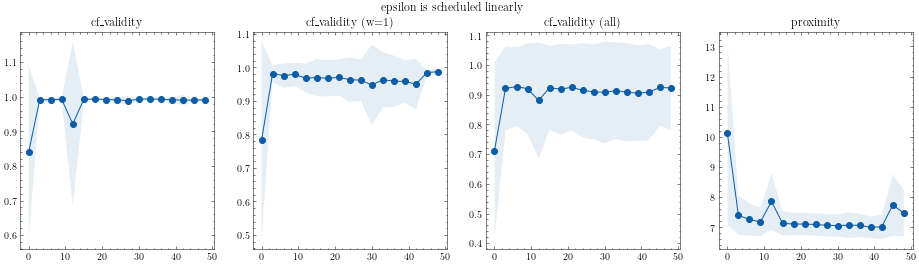

In [14]:
fig, axs = plt.subplots(1, 4,  figsize=(16, 4))
epochs = np.arange(n_models) * interval
columns = ['cf_validity', 'cf_validity (w=1)', 'cf_validity (all)', 'proximity']
fig.suptitle('epsilon is scheduled linearly')

for i, col in enumerate(columns):
    avg_res_list = np.array([linear_cf_results[i][col]['mean'] for i in range(n_models)])
    std_res_list = np.array([linear_cf_results[i][col]['std'] for i in range(n_models)])
    axs[i].plot(epochs, avg_res_list, marker='o')
    axs[i].fill_between(
        epochs, 
        avg_res_list - std_res_list,
        avg_res_list + std_res_list,
        alpha=0.1,
    )
    axs[i].set_title(col)